<a href="https://colab.research.google.com/github/hendrixtlan/tareaManipulacionDatos/blob/main/Actividad4EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 4**
Exploración de datos

---

*   NOMBRE: JOSE ISRAEL MALDONADO JARAMILLO
*   MATRÍCULA: A01683218

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/"
os.chdir(DIR)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("credit_risk_dataset.csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# **Parte 1**. Análisis descriptivo (univariante)

1. Utiliza el método `info()` del dataframe, para obtener el resumen de los tipos de datos. ¿Cuántas columnas son numéricas y cuántas cualitativas?

In [10]:
df.info()
df.select_dtypes(exclude = ['object'])
df.select_dtypes(exclude = ['number'])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,RENT,PERSONAL,D,Y
1,OWN,EDUCATION,B,N
2,MORTGAGE,MEDICAL,C,N
3,RENT,MEDICAL,C,N
4,RENT,MEDICAL,C,Y
...,...,...,...,...
32576,MORTGAGE,PERSONAL,C,N
32577,MORTGAGE,PERSONAL,A,N
32578,RENT,HOMEIMPROVEMENT,B,N
32579,MORTGAGE,PERSONAL,B,N


 2. Determina el porcentaje de valores faltantes por columna.

In [13]:
porcentaje_faltante = df.isnull().sum()*100/len(df)
valores_faltantes_df= pd.DataFrame({'column_name':df.columns,'porcentaje_faltante':porcentaje_faltante})
print(valores_faltantes_df)

                                           column_name  porcentaje_faltante
person_age                                  person_age             0.000000
person_income                            person_income             0.000000
person_home_ownership            person_home_ownership             0.000000
person_emp_length                    person_emp_length             2.747000
loan_intent                                loan_intent             0.000000
loan_grade                                  loan_grade             0.000000
loan_amnt                                    loan_amnt             0.000000
loan_int_rate                            loan_int_rate             9.563856
loan_status                                loan_status             0.000000
loan_percent_income                loan_percent_income             0.000000
cb_person_default_on_file    cb_person_default_on_file             0.000000
cb_person_cred_hist_length  cb_person_cred_hist_length             0.000000


# Análisis de variables numéricas

3. Obtén las siguientes estadísticas descriptivas para todas las variables numéricas:
*   Tendencia central (media, mediana)
*   Dispersión o variabilidad (min, max, desviación estándar, cuartiles)
*   Forma (asimetría y curtosis)
*   Clasifica las variables `person_age` y `loan_in_rate` según los valores observados de asimetría y curtosis

**NOTA**. Recuerda que muchas de estas estadísticas, puedes obtenerlas utilizando la función `describe()` y que la mediana está representada en el 2do cuartil (50%)

In [64]:
edad =df["person_age"]
mean_edad = edad.mean()
median_edad =edad.median()
edadQ1=np.percentile(edad.sort_values(),25)
edadQ2=np.percentile(edad.sort_values(),50)
edadQ3=np.percentile(edad.sort_values(),75)

ingreso =df["person_income"]
mean_ingreso = ingreso.mean()
median_ingreso = ingreso.median()
ingresoQ1=np.percentile(ingreso.sort_values(),25)
ingresoQ2=np.percentile(ingreso.sort_values(),50)
ingresoQ3=np.percentile(ingreso.sort_values(),75)


empleo = df["person_emp_length"]
mean_empleo = empleo.mean()
empleoQ1=np.nanpercentile(empleo.sort_values(),25),
empleoQ2=np.nanpercentile(empleo.sort_values(),50),
empleoQ3=np.nanpercentile(empleo.sort_values(),75),

prestamo = df["loan_amnt"]

tasa = df["loan_int_rate"]
status = df["loan_status"]
porcentaje_del_ingreso=df["loan_percent_income"]
historial_crediticio = df["cb_person_cred_hist_length"]

print("media de edad:", mean_edad ,
      "mediana de edad:", median_edad,
      "mínima edad:",edad.min(),
       "máxima edad:",edad.max(),
       "Desviacion estandard edad:",edad.std(),
       edadQ1,
       edadQ2,
       edadQ3,
      edad.skew(),
      edad.kurt(),

      '\n',


      "media ingreso:",mean_ingreso ,
      "mediana ingreso:", median_ingreso,
      "mínima ingreso:",ingreso.min(),
       "máxima ingreso:",ingreso.max(),
       "Desviacion estandard :",ingreso.std(),
       ingresoQ1,
       ingresoQ2,
       ingresoQ3,
      ingreso.skew(),
      ingreso.kurt(),'\n',

      "media empleo:", mean_empleo,
      "mediana empleo:",empleo.median(),
      "mínima empleo:",empleo.min(),
       "máxima empleo:",empleo.max(),
       "Desviacion empleo :",empleo.std(),
      empleoQ1,
      empleoQ2,
      empleoQ3,
      empleo.skew(),
      empleo.kurt(),
      '\n',

      "media prestamo:", prestamo.mean(),
      "mediana prestamo", prestamo.median(),
      "mínima prestamo:",prestamo.min(),
      "máxima prestamo:",prestamo.max(),
      "Desviacion prestamo :",prestamo.std(),
      np.percentile(prestamo.sort_values(),25),
      np.percentile(prestamo.sort_values(),50),
      np.percentile(prestamo.sort_values(),75),
      prestamo.skew(),
      prestamo.kurt(),
      '\n',

      "media tasa:", tasa.mean(),
      "mediana tasa", tasa.median(),
      "mínima tasa:", tasa.min(),
      "máxima tasa:",tasa.max(),
      "Desviacion tasa :",tasa.std(),
      np.nanpercentile(tasa.sort_values(),25),
      np.nanpercentile(tasa.sort_values(),50),
      np.nanpercentile(tasa.sort_values(),75),
      tasa.skew(),
      tasa.kurt(),
      '\n',

      "media status:", status.mean(),
      "mediana status", status.median(),
      "mínima status:", status.min(),
      "máxima status:",status.max(),
      "Desviacion status:",status.std(),
      np.percentile(status.sort_values(),25),
      np.percentile(status.sort_values(),50),
      np.percentile(status.sort_values(),75),
      status.skew(),
      status.kurt(),'\n',

      "media porcentaje respecto a ingreso:", porcentaje_del_ingreso.mean(),
      "mediana porcentaje respecto a ingreso", porcentaje_del_ingreso.median(),
      "mínima porcentaje respecto a ingreso:", porcentaje_del_ingreso.min(),
      "máxima porcentaje respecto a ingreso:",porcentaje_del_ingreso.max(),
      "Desviacion porcentaje respecto a ingreso:",porcentaje_del_ingreso.std(),
      np.percentile(porcentaje_del_ingreso.sort_values(),25),
      np.percentile(porcentaje_del_ingreso.sort_values(),50),
      np.percentile(porcentaje_del_ingreso.sort_values(),75),
      porcentaje_del_ingreso.skew(),
      porcentaje_del_ingreso.kurt(),
      '\n',


      "media historial crediticio:", historial_crediticio.mean(),
       "mediana historial crediticio", historial_crediticio.median(),
      "mínima historial crediticio:", historial_crediticio.min(),
      "máxima historial crediticio:", historial_crediticio.max(),
      "Desviacion historial crediticio:", historial_crediticio.std(),
      np.percentile(historial_crediticio.sort_values(),25),
      np.percentile(historial_crediticio.sort_values(),50),
      np.percentile(historial_crediticio.sort_values(),75),
      historial_crediticio.skew(),
      historial_crediticio.kurt()


      )



media de edad: 27.73459992019889 mediana de edad: 26.0 mínima edad: 20 máxima edad: 144 Desviacion estandard edad: 6.348078419225359 23.0 26.0 30.0 2.5813925261849846 18.560824765312866 
 media ingreso: 66074.84846996715 mediana ingreso: 55000.0 mínima ingreso: 4000 máxima ingreso: 6000000 Desviacion estandard : 61983.11916815907 38500.0 55000.0 79200.0 32.865348833904434 2693.272775674123 
 media empleo: 4.789686296787225 mediana empleo: 4.0 mínima empleo: 0.0 máxima empleo: 123.0 Desviacion empleo : 4.1426301488878625 (2.0,) (4.0,) (7.0,) 2.6144551214595424 43.722338216746564 
 media prestamo: 9589.371105859243 mediana prestamo 8000.0 mínima prestamo: 500 máxima prestamo: 35000 Desviacion prestamo : 6322.086645792259 5000.0 8000.0 12200.0 1.1924774277661998 1.4235653072764443 
 media tasa: 11.011694892245036 mediana tasa 10.99 mínima tasa: 5.42 máxima tasa: 23.22 Desviacion tasa : 3.2404594649559466 7.9 10.99 13.47 0.2085503016908977 -0.6716091079813706 
 media status: 0.218163960590

4. Utiliza histogramas para determinar la distribución de los valores representados en cada variable.
*   ¿Se corresponde con lo obtenido en el cálculo de asimetría? Como verás, los datos reales son más complejos que la teoría. Por esta razón, recuerda siempre acompañar el análisis de la asimetría con algún gráfico como un histograma.

**NOTA**. Para esto también puedes ocupar los gráficos `kde` ([kernel density estimation](https://www.cienciadedatos.net/documentos/pystats02-kernel-density-estimation-kde-python.html)) que crean una curva continua y suave expandiendo la idea del histograma.

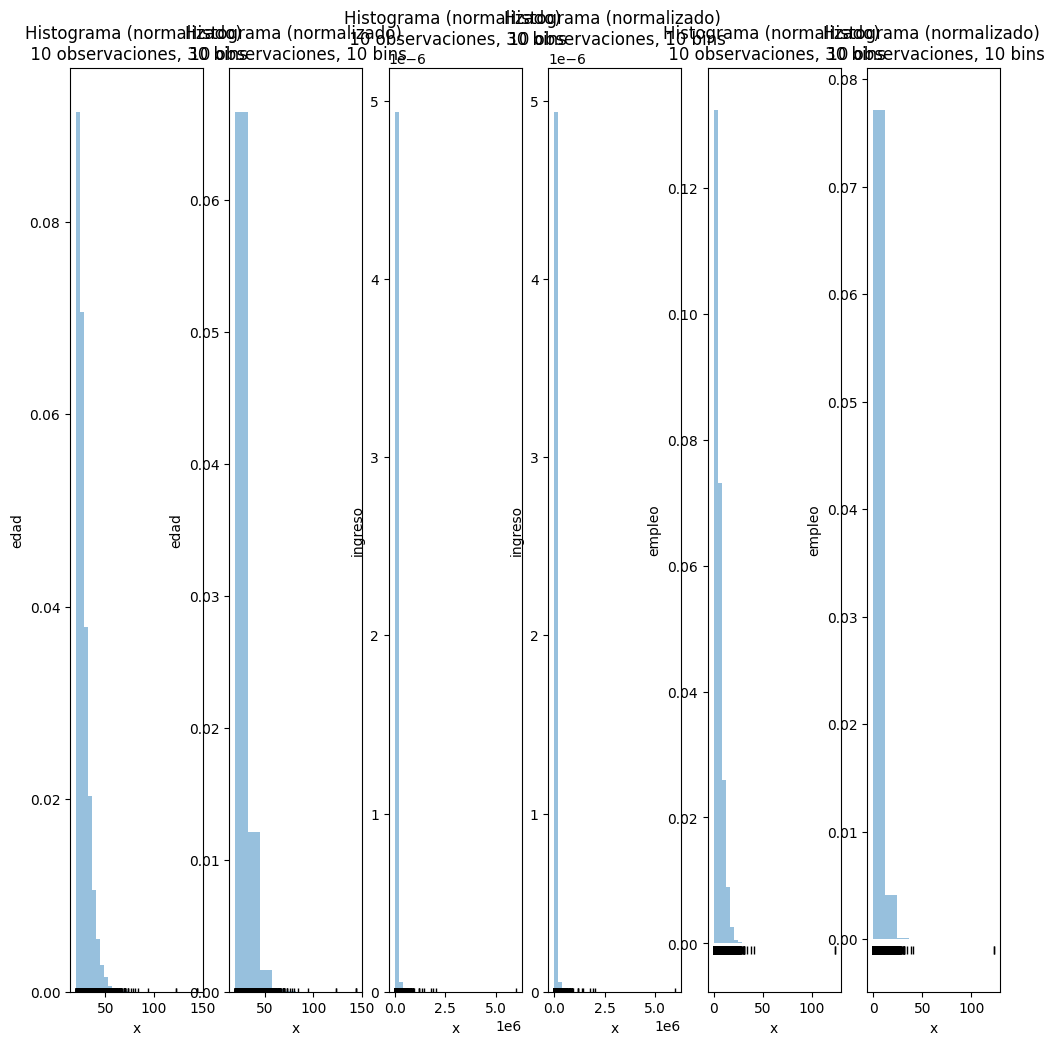

In [155]:
fig, axs = plt.subplots(ncols=6, nrows=1, figsize=(12,12))
axs[0].hist(edad, bins=30, density=True, color="#3182bd", alpha=0.5)
axs[0].plot(edad, np.full_like(edad, -0.001), '|k', markeredgewidth=1)
axs[0].set_title('Histograma (normalizado) \n 10 observaciones, 30 bins')
axs[0].set_xlabel('x')
axs[0].set_ylabel('edad');

axs[1].hist(edad, bins=10, density=True, color="#3182bd", alpha=0.5)
axs[1].plot(edad, np.full_like(edad, -0.001), '|k', markeredgewidth=1)
axs[1].set_title('Histograma (normalizado) \n 10 observaciones, 10 bins')
axs[1].set_xlabel('x')
axs[1].set_ylabel('edad');

axs[2].hist(ingreso, bins=30, density=True, color="#3182bd", alpha=0.5)
axs[2].plot(ingreso, np.full_like(ingreso, -0.001), '|k', markeredgewidth=1)
axs[2].set_title('Histograma (normalizado) \n 10 observaciones, 30 bins')
axs[2].set_xlabel('x')
axs[2].set_ylabel('ingreso');

axs[3].hist(ingreso, bins=30, density=True, color="#3182bd", alpha=0.5)
axs[3].plot(ingreso, np.full_like(ingreso, -0.001), '|k', markeredgewidth=1)
axs[3].set_title('Histograma (normalizado) \n 10 observaciones, 10 bins')
axs[3].set_xlabel('x')
axs[3].set_ylabel('ingreso');

axs[4].hist(empleo, bins=30, density=True, color="#3182bd", alpha=0.5)
axs[4].plot(empleo, np.full_like(empleo, -0.001), '|k', markeredgewidth=1)
axs[4].set_title('Histograma (normalizado) \n 10 observaciones, 30 bins')
axs[4].set_xlabel('x')
axs[4].set_ylabel('empleo');
'\n';

axs[5].hist(empleo, bins=10, density=True, color="#3182bd", alpha=0.5)
axs[5].plot(empleo, np.full_like(empleo, -0.001), '|k', markeredgewidth=1)
axs[5].set_title('Histograma (normalizado) \n 10 observaciones, 10 bins')
axs[5].set_xlabel('x')
axs[5].set_ylabel('empleo');






5. Emplea boxplots para mostrar la distribución de los datos a través de sus cuartiles.

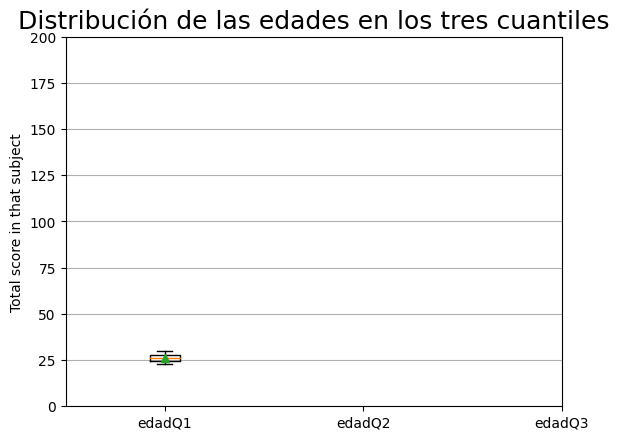

In [150]:
scores = [edadQ1, edadQ2, edadQ3]

# Create a boxplot of the scores
box = plt.boxplot(scores, showmeans=True)



plt.ylim([0, 200])

plt.grid(True, axis='y')


plt.title('Distribución de las edades en los tres cuantiles', fontsize=18)


plt.ylabel('Total score in that subject')

plt.xticks([1, 2, 3], ['edadQ1', 'edadQ2', 'edadQ3'])

# Display the plot
plt.show()

*   Como podrás observar hay valores atípicos en todas las variables. Ejecuta el siguiente código para identificar los valores atípicos en la variable `person_age`

In [100]:
percentile_25 = df["person_age"].quantile(0.25)
percentile_75 = df["person_age"].quantile(0.75)
iqr = percentile_75 - percentile_25
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr
IQR_outliers = df[(df["person_age"] < lower_limit) | (df["person_age"] > upper_limit)]
IQR_outliers

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
81,144,250000,RENT,4.0,VENTURE,C,4800,13.57,0,0.02,N,3
183,144,200000,MORTGAGE,4.0,EDUCATION,B,6000,11.86,0,0.03,N,2
575,123,80004,RENT,2.0,EDUCATION,B,20400,10.25,0,0.25,N,3
747,123,78000,RENT,7.0,VENTURE,B,20000,NaN,0,0.26,N,4
29121,50,900000,MORTGAGE,11.0,DEBTCONSOLIDATION,B,30000,12.69,0,0.03,N,15
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


# Análisis de variables de texto

 6. Obtén las siguientes estadísticas descriptivas para todas las variables de texto:
*   Tendencia central (moda)
*   Cardinalidad (cantidad de valores únicos)
*   Recuentos únicos (número de ocurrencias para cada valor único)

**NOTA**. Un resumen de estas estadísticas, puedes obtenerlas indicando en la función `describe()` que se incluirán sólo las variables de tipo object: `describe(include = 'object')`. Para los recuentos utiliza la función `df['columna'].value_counts()`

In [154]:
df.describe(include='object')

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
count,32581,32581,32581,32581
unique,4,6,7,2
top,RENT,EDUCATION,A,N
freq,16446,6453,10777,26836


7. Utiliza gráficos de barras por variable para representar la frecuencia de cada categoría.

**NOTA**. seaborn posee un gráfico de recuento, para variables de tipo object, que calcula la frecuencia de cada categoría sin necesidad de utilizar la función `value_counts()`. Para generarlo debes indicar la columna: `sns.countplot(x='columna', data=df) `

<Axes: xlabel='person_age', ylabel='count'>

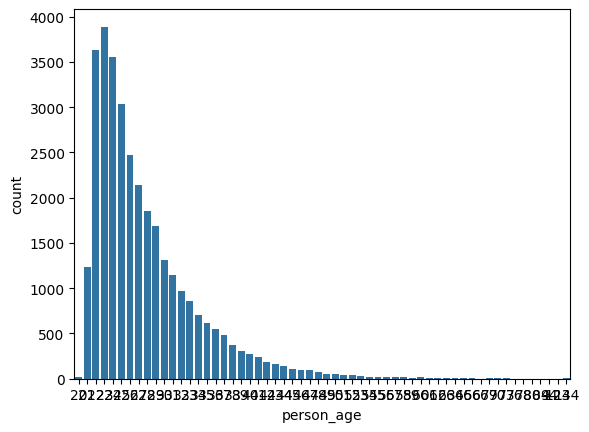

In [158]:
sns.countplot(x=edad, data=df)

# **Parte 2**. Análisis de correlación (bivariante y multivariante)

La variable `loan_status` será la variable de salida (o a predecir en un modelo de ML). Analiza su relación con el resto de las variables a través de los siguientes gráficos:

8. Un box plot para visualizar la distribución de `loan_percent_income` según el `loan_status`. Interpreta el resultado.

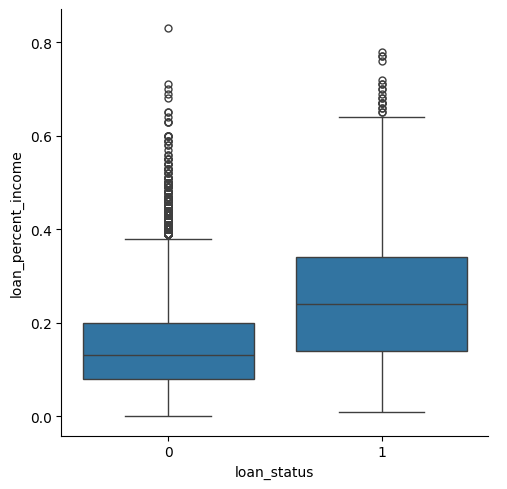

In [173]:
sns.catplot(y="loan_percent_income", x="loan_status", kind="box", data=df)

 9. En los gráficos de barras que obtuviste en el ejercicio 7, separa el conteo según el `load_status`, utilizando el parámetro `hue`.

<Axes: xlabel='person_age', ylabel='count'>

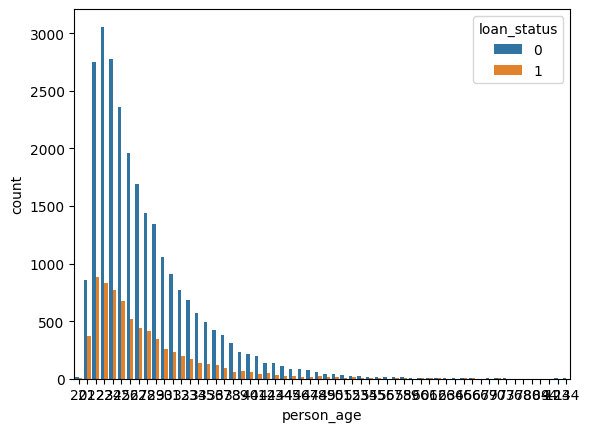

In [177]:
sns.countplot(x=edad, data=df, hue="loan_status")

10. Un mapa de calor con los valores de correlación de todas las variables del dataframe.
*   ¿Qué variable tiene mayor correlación con `loan_status`?

<Axes: >

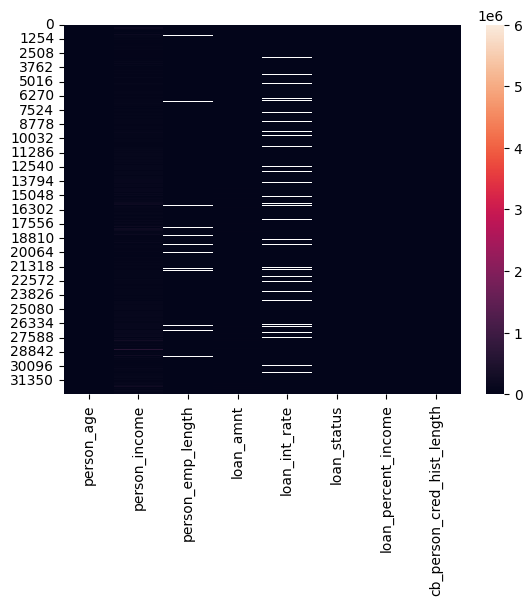

In [186]:
sns.heatmap(df[["person_age","person_income","person_emp_length","loan_amnt","loan_int_rate","loan_status","loan_percent_income","cb_person_cred_hist_length"]])



